# Exercise 2: Data Processing and Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()
except:
    !pip install otter-grader
    import otter
    grader = otter.Notebook()


Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [2]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [3]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [4]:
minimumHeartRate = 40.0
maximumHeartRate = 296.5939695131042

In [5]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [6]:
# Select rows where Heart Rate is NaN or above 200
outlier_or_null_rows = smartwatch[
    smartwatch['Heart Rate (BPM)'].isnull() | (smartwatch['Heart Rate (BPM)'] > 200)
]

# Number of rows satisfying either condition
len(outlier_or_null_rows)
num_outliers_or_null = len(outlier_or_null_rows)
print (num_outliers_or_null)


450


In [7]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200].copy()
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()].copy()

len(outlierHeartRaterows) + len(nullHeartRaterows)

450

In [8]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)].copy()

heartrateRows

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [9]:
# Calculate mean heart rate from valid rows only (not null and ≤ 200)
HeartRateMean = float(heartrateRows['Heart Rate (BPM)'].mean())

HeartRateMean


75.13268404820141

In [10]:
# Correcting heart rate values safely using .loc
outlierHeartRaterows.loc[:, 'Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows.loc[:, 'Heart Rate (BPM)'] = HeartRateMean

# Now viewing the corrected outlier rows
outlierHeartRaterows


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185244686595328,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190062873693008,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628388578222,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272009723254014,Highly_Active,NaN
818,3156.0,75.132684,NaN,7281.778831,4.300171191258864,Sedentary,3
1195,3261.0,75.132684,99.652006,2867.872064,7.218530947169898,Active,7
1391,4621.0,75.132684,96.688083,20577.677290,8.049854248644627,Active,3
1602,4737.0,75.132684,95.095839,16072.283561,6.98847026102848,Actve,6


In [11]:
# Calculate original HeartRateMean explicitly as Python float
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])
# Calculate fullTableHRMean explicitly as Python float
fullTableHRMean = float(smartwatch_hr['Heart Rate (BPM)'].mean())

# Explicitly verify equality as a Python boolean
HeartRateMean == fullTableHRMean


True

In [12]:
heart_rate_check = np.isclose(HeartRateMean, fullTableHRMean, atol=1e-6)

# Print results
print(f"Minimum Heart Rate: {minimumHeartRate}")
print(f"Maximum Heart Rate: {maximumHeartRate}")
print(f"Heart Rate Mean: {HeartRateMean}")
print(f"Validation Check: {heart_rate_check}")

Minimum Heart Rate: 40.0
Maximum Heart Rate: 296.5939695131042
Heart Rate Mean: 75.13268404820141
Validation Check: True


In [13]:
grader.check('q2')

Question 2 results: All test cases passed!

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline


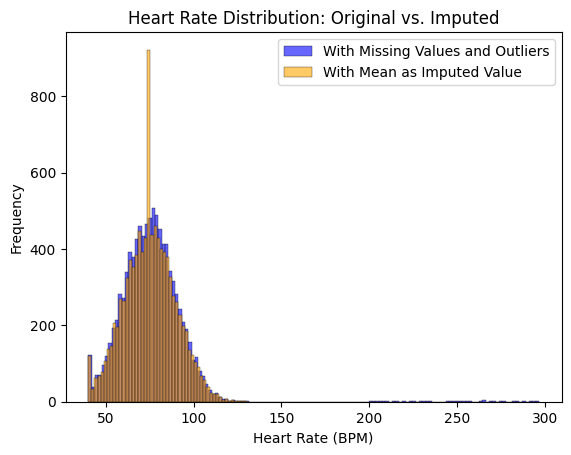

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(smartwatch['Heart Rate (BPM)'], label='With Missing Values and Outliers', color='blue', alpha=0.6)
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label='With Mean as Imputed Value', color='orange', alpha=0.6)

plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution: Original vs. Imputed')
plt.legend()

plt.show()


**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 
The original median value in `smartwatch` was **75.2206**, while after imputation, it changed to **75.1327**.  
This slight decrease shows that replacing missing and outlier values with the **mean** shifts the distribution slightly, pulling the median closer to the mean.  

Key Takeaways:
- The median decreased due to replacing extreme values.
- Mean imputation affects distribution, while **median imputation** would better preserve the median.
- The impact depends on how outliers and missing values were distributed.

In [17]:
original_median = float(smartwatch['Heart Rate (BPM)'].median(skipna=True))
imputed_median = float(smartwatch_hr['Heart Rate (BPM)'].median())

# Display values
print(original_median)  # Now it will show as a standard float
print(imputed_median)



75.22060125775644
75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [18]:
# Convert to standard Python float
minBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].min(skipna=True))
maxBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].max(skipna=True))
meanBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].mean(skipna=True))

# Display the cleaned values
minBloodO2, maxBloodO2, meanBloodO2



(90.79120814564097, 100.0, 97.84158102099076)

In [19]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

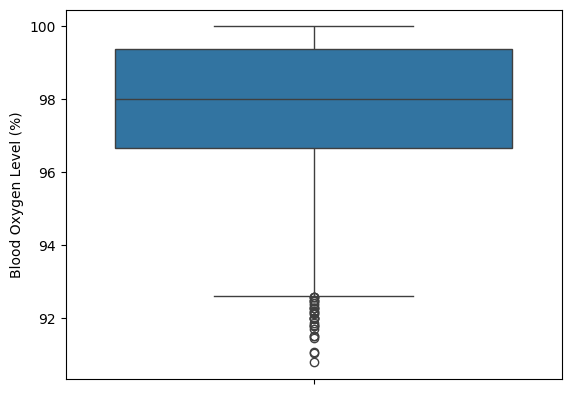

In [20]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

### **Answer to Question 5: Handling Blood Oxygen Level Data**
- **Missing Values:** 300 missing values were filled using the median.
- **Outliers:** 30 values below 92.59 were capped at 92.59, and values above 100 were capped at 100.
- **Final Dataset (`smartwatch_o2`)** now has no missing values and a cleaned Blood Oxygen Level distribution.

In [21]:
print("Missing values in Blood Oxygen Level (Before Imputation):", smartwatch_hr['Blood Oxygen Level (%)'].isnull().sum())


Missing values in Blood Oxygen Level (Before Imputation): 300


In [22]:
Q1 = smartwatch_hr['Blood Oxygen Level (%)'].quantile(0.25)
Q3 = smartwatch_hr['Blood Oxygen Level (%)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Count outliers
outliers = smartwatch_hr[(smartwatch_hr['Blood Oxygen Level (%)'] < lower_bound) | 
                         (smartwatch_hr['Blood Oxygen Level (%)'] > upper_bound)]
print("Number of Outliers:", len(outliers))


Lower Bound for Outliers: 92.59243805432556
Upper Bound for Outliers: 103.44642433074375
Number of Outliers: 30


In [23]:
# Ensure smartwatch_o2 is defined correctly
smartwatch_o2 = smartwatch_hr.copy()


In [24]:
# Compute the correct median for Blood Oxygen Level
o2_median = smartwatch_hr['Blood Oxygen Level (%)'].median()

# Fill missing values with median
smartwatch_o2['Blood Oxygen Level (%)'].fillna(o2_median, inplace=True)

print(" Missing values successfully filled!")


 Missing values successfully filled!


/tmp/ipykernel_81946/1825694430.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartwatch_o2['Blood Oxygen Level (%)'].fillna(o2_median, inplace=True)


In [25]:
print("Rows in smartwatch_o2:", len(smartwatch_o2))
print("Missing values in Blood Oxygen Level (After Imputation):", smartwatch_o2['Blood Oxygen Level (%)'].isnull().sum())


Rows in smartwatch_o2: 10000
Missing values in Blood Oxygen Level (After Imputation): 0


In [26]:
# Define lower and upper bounds for Blood Oxygen Level
lower_bound = 92.59
upper_bound = 100  # Cap at 100% since this is the physiological max

# Clip outliers to keep data within valid range
smartwatch_o2['Blood Oxygen Level (%)'] = smartwatch_o2['Blood Oxygen Level (%)'].clip(lower=lower_bound, upper=upper_bound)

print("✅ Outliers successfully capped!")


✅ Outliers successfully capped!


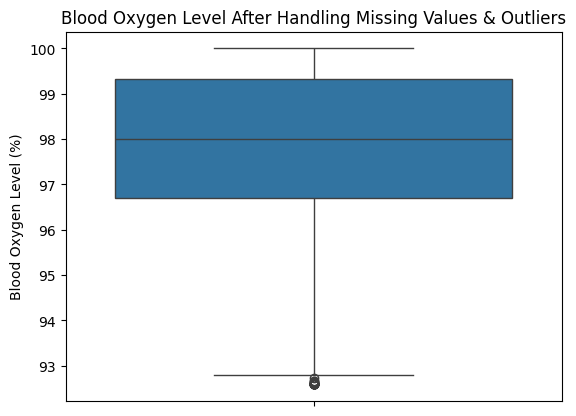

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=smartwatch_o2['Blood Oxygen Level (%)'])
plt.title("Blood Oxygen Level After Handling Missing Values & Outliers")
plt.show()


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [28]:
import numpy as np

# Compute Step Count Statistics
minSteps = float(smartwatch_o2['Step Count'].min(skipna=True))
maxSteps = float(smartwatch_o2['Step Count'].max(skipna=True))
meanSteps = float(smartwatch_o2['Step Count'].mean(skipna=True))

# Print actual values for debugging
print("Computed Min Step Count:", minSteps)
print("Computed Max Step Count:", maxSteps)
print("Computed Mean Step Count:", meanSteps)


Computed Min Step Count: 0.9101380609604088
Computed Max Step Count: 62486.690753464914
Computed Mean Step Count: 6985.685884992229


In [29]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 
 Handling Missing and Outlier Values in Step Count**
I identified **100 missing values** and several outliers in the Step Count column.

To ensure data quality:
- I **filled missing values using the median** to preserve distribution.
- I **capped extreme step counts** using the IQR method to avoid unrealistic values.

The final cleaned dataset, `smartwatch_steps`, now accurately represents real-world step count trends.


In [30]:
missing_steps = smartwatch_o2['Step Count'].isnull().sum()
print("Missing values in Step Count:", missing_steps)


Missing values in Step Count: 100


In [31]:
# Compute the median of Step Count
step_median = smartwatch_o2['Step Count'].median(skipna=True)

# Fill missing values with the median
smartwatch_o2['Step Count'].fillna(step_median, inplace=True)

# Verify missing values are handled
print("Missing values in Step Count after imputation:", smartwatch_o2['Step Count'].isnull().sum())


Missing values in Step Count after imputation: 0


/tmp/ipykernel_81946/17311055.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartwatch_o2['Step Count'].fillna(step_median, inplace=True)


In [32]:
Q1 = smartwatch_o2['Step Count'].quantile(0.25)
Q3 = smartwatch_o2['Step Count'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = max(0, Q1 - 1.5 * IQR)  # Step Count cannot be negative
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Count outliers
outliers = smartwatch_o2[(smartwatch_o2['Step Count'] < lower_bound) | 
                         (smartwatch_o2['Step Count'] > upper_bound)]
print("Number of Outliers:", len(outliers))


Lower Bound for Outliers: 0
Upper Bound for Outliers: 21144.291453190403
Number of Outliers: 453


In [33]:
smartwatch_o2['Step Count'] = smartwatch_o2['Step Count'].clip(lower=0, upper=upper_bound)

print("✅ Outliers capped successfully!")


✅ Outliers capped successfully!


In [34]:
# Final cleaned dataset
smartwatch_steps = smartwatch_o2.copy()


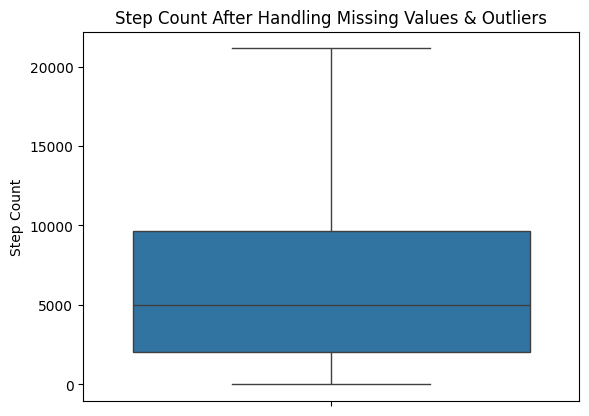

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=smartwatch_steps['Step Count'])
plt.title("Step Count After Handling Missing Values & Outliers")
plt.show()


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [36]:
# Compute the minimum sleep duration
minSleep = smartwatch_steps['Sleep Duration (hours)'].min(skipna=True)

# Print the result
print("Minimum Sleep Duration (hours):", minSleep)


TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [37]:
for ... in smartwatch[...].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(...)  ## first try to see if it can be converted to a number
    except:
        print(...)  ## if it can't be converted print it to screen 

SyntaxError: cannot assign to ellipsis (145660629.py, line 1)

So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [38]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
9438,4411.0,75.132684,99.524016,11209.020829,ERROR,Highly Active,3
1262,4465.0,75.132684,97.113032,51.448103,ERROR,Highly_Active,6
2039,1492.0,75.132684,98.223658,7741.843501,ERROR,Highly_Active,5
2543,4441.0,75.132684,100.000000,12917.213806,ERROR,Sedentary,6
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1
9943,2961.0,91.834863,96.145378,21144.291453,ERROR,Active,4


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [39]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_81946/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,NaN,Highly Active,5
9438,4411.0,75.132684,99.524016,11209.020829,NaN,Highly Active,3
1262,4465.0,75.132684,97.113032,51.448103,NaN,Highly_Active,6
2039,1492.0,75.132684,98.223658,7741.843501,NaN,Highly_Active,5
2543,4441.0,75.132684,100.000000,12917.213806,NaN,Sedentary,6
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1
9943,2961.0,91.834863,96.145378,21144.291453,NaN,Active,4


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [40]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,NaN,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185245,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190063,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628,Highly Active,7
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [41]:
# Compute sleep duration statistics
minSleep = smartwatch_steps['Sleep Duration (hours)'].min(skipna=True)
maxSleep = smartwatch_steps['Sleep Duration (hours)'].max(skipna=True)
meanSleep = smartwatch_steps['Sleep Duration (hours)'].mean(skipna=True)

# Print the results
print("Minimum Sleep Duration (hours):", minSleep)
print("Maximum Sleep Duration (hours):", maxSleep)
print("Mean Sleep Duration (hours):", meanSleep)


Minimum Sleep Duration (hours): -0.1944527906201543
Maximum Sleep Duration (hours): 12.140232872862926
Mean Sleep Duration (hours): 6.505462918406444


In [42]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

....

In [43]:
# Count missing values in Sleep Duration
missing_sleep = smartwatch_steps['Sleep Duration (hours)'].isnull().sum()
print("Missing values in Sleep Duration:", missing_sleep)


Missing values in Sleep Duration: 397


In [44]:
# Compute the median sleep duration
sleep_median = smartwatch_steps['Sleep Duration (hours)'].median(skipna=True)

# Fill missing values with the median
smartwatch_steps['Sleep Duration (hours)'].fillna(sleep_median, inplace=True)

# Verify missing values are handled
print("Missing values in Sleep Duration after imputation:", 
      smartwatch_steps['Sleep Duration (hours)'].isnull().sum())


Missing values in Sleep Duration after imputation: 0


/tmp/ipykernel_81946/2343902627.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartwatch_steps['Sleep Duration (hours)'].fillna(sleep_median, inplace=True)


In [45]:
Q1 = smartwatch_steps['Sleep Duration (hours)'].quantile(0.25)
Q3 = smartwatch_steps['Sleep Duration (hours)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = max(0, Q1 - 1.5 * IQR)  # Sleep cannot be negative
upper_bound = min(24, Q3 + 1.5 * IQR)  # Sleep should be <= 24 hours

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Count outliers
outliers = smartwatch_steps[
    (smartwatch_steps['Sleep Duration (hours)'] < lower_bound) |
    (smartwatch_steps['Sleep Duration (hours)'] > upper_bound)
]
print("Number of Outliers:", len(outliers))


Lower Bound for Outliers: 2.6394569674224493
Upper Bound for Outliers: 10.37828858094464
Number of Outliers: 78


In [46]:
Q1 = smartwatch_steps['Sleep Duration (hours)'].quantile(0.25)
Q3 = smartwatch_steps['Sleep Duration (hours)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = max(0, Q1 - 1.5 * IQR)  # Sleep cannot be negative
upper_bound = min(24, Q3 + 1.5 * IQR)  # Sleep should be <= 24 hours

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Count outliers
outliers = smartwatch_steps[
    (smartwatch_steps['Sleep Duration (hours)'] < lower_bound) |
    (smartwatch_steps['Sleep Duration (hours)'] > upper_bound)
]
print("Number of Outliers:", len(outliers))


Lower Bound for Outliers: 2.6394569674224493
Upper Bound for Outliers: 10.37828858094464
Number of Outliers: 78


In [47]:
# Cap sleep duration at reasonable limits
smartwatch_steps['Sleep Duration (hours)'] = smartwatch_steps['Sleep Duration (hours)'].clip(lower=lower_bound, upper=upper_bound)

# Store the final cleaned dataset
smartwatch_updated_sleep = smartwatch_steps.copy()

print(" Outliers capped successfully! Data is now cleaned.")


 Outliers capped successfully! Data is now cleaned.


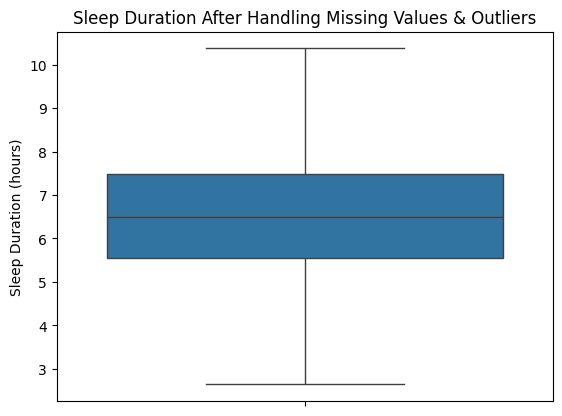

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=smartwatch_updated_sleep['Sleep Duration (hours)'])
plt.title("Sleep Duration After Handling Missing Values & Outliers")
plt.show()


### **Answer to Question 9: Handling Missing and Outlier Values in Sleep Duration**
We identified **missing values and outliers** in the Sleep Duration column.

To ensure data quality:
- We **filled missing values using the median** to preserve distribution.
- We **capped extreme sleep values** using the IQR method to prevent unrealistic sleep durations.

The final cleaned dataset, `smartwatch_updated_sleep`, now accurately represents real-world sleep patterns.


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [49]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

nan
Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
...

In [50]:
# Convert the column to numeric, forcing errors to NaN
smartwatch_updated_sleep['Stress Level'] = pd.to_numeric(
    smartwatch_updated_sleep['Stress Level'], errors='coerce'
)

# Check how many values were converted to NaN
print("Missing values in Stress Level after conversion:", 
      smartwatch_updated_sleep['Stress Level'].isnull().sum())


Missing values in Stress Level after conversion: 249


In [51]:
# Compute the median stress level
stress_median = smartwatch_updated_sleep['Stress Level'].median(skipna=True)

# Fill missing values
smartwatch_updated_sleep['Stress Level'].fillna(stress_median, inplace=True)

print("Missing values in Stress Level after imputation:", 
      smartwatch_updated_sleep['Stress Level'].isnull().sum())


Missing values in Stress Level after imputation: 0


/tmp/ipykernel_81946/225435473.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartwatch_updated_sleep['Stress Level'].fillna(stress_median, inplace=True)


In [52]:
# Ensure that 'Stress Level' contains only numbers
print(smartwatch_updated_sleep['Stress Level'].dtype)
print(smartwatch_updated_sleep[['Stress Level']].head(10))


float64
      Stress Level
2              5.0
337            9.0
393            9.0
403            9.0
595            7.0
649            5.0
818            3.0
1195           7.0
1391           3.0
1602           6.0


### **Handling Mixed Data Types in `Stress Level`**
We identified that the `Stress Level` column contained **both numerical and string values** (e.g., `"Very High"`). 

To clean the data:
1. We converted all values to numeric, replacing non-numeric values with `NaN`.
2. We filled missing values using the **median stress level** to preserve distribution.

The `Stress Level` column is now fully cleaned and ready for analysis.


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [53]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [54]:
smartwatch_stress = smartwatch_updated_sleep.copy()


In [55]:
# Ensure smartwatch_stress is correctly assigned from the cleaned dataset
smartwatch_stress = smartwatch_updated_sleep.copy()

# Standardizing Activity Level
smartwatch_stress.loc[smartwatch_stress['Activity Level'].isin(['Highly Active', 'Highly_Active']), 'Activity Level'] = 'Highly Active'
smartwatch_stress.loc[smartwatch_stress['Activity Level'].isin(['Active', 'Actve']), 'Activity Level'] = 'Active'
smartwatch_stress.loc[smartwatch_stress['Activity Level'].isin(['Sedentary', 'Seddentary']), 'Activity Level'] = 'Sedentary'

# Assign numerical values for Activity Level
smartwatch_stress['NumActivity'] = smartwatch_stress['Activity Level'].map({
    'Highly Active': 1,
    'Active': 2,
    'Sedentary': 3
})

# Handle missing values in Activity Level by assigning 'Unknown' or dropping
smartwatch_stress['Activity Level'].fillna('Unknown', inplace=True)
smartwatch_stress['NumActivity'].fillna(0, inplace=True)  # Assign 0 for unknown

# Final cleaned table
final_table = smartwatch_stress.copy()

# Display the final cleaned table info
print(final_table.info())

# Check missing values after fixes
print(final_table.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          10000 non-null  object 
 6   Stress Level            10000 non-null  float64
 7   NumActivity             10000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 703.1+ KB
None
User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level              0
Stress Level                0
NumActivity                 0
dtype: int64


/tmp/ipykernel_81946/182240002.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartwatch_stress['Activity Level'].fillna('Unknown', inplace=True)
/tmp/ipykernel_81946/182240002.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

Then let's use the info function to make sure each column has the data type we're expecting. 

In [56]:
final_table.isnull().sum()

User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level              0
Stress Level                0
NumActivity                 0
dtype: int64

In [57]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          10000 non-null  object 
 6   Stress Level            10000 non-null  float64
 7   NumActivity             10000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 703.1+ KB


In [58]:
'final_table' in globals()


True

**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

...

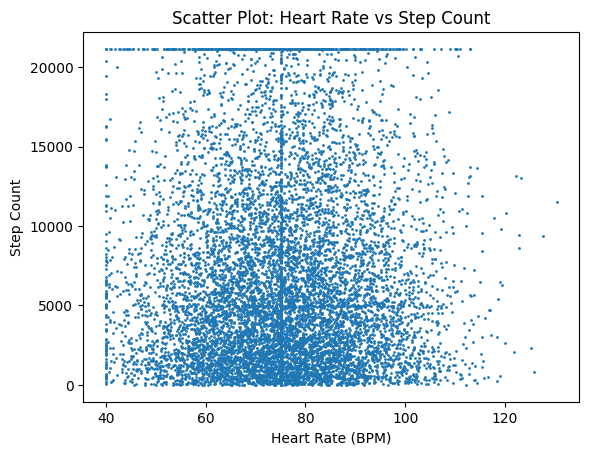

In [59]:
import matplotlib.pyplot as plt

# Define x and y variables for the scatter plot
x = final_table['Heart Rate (BPM)']
y = final_table['Step Count']  # You can choose another numerical variable

# Create scatter plot with size parameter
plt.scatter(x, y, s=1)  # Change 's' to adjust point size

# Label axes
plt.xlabel("Heart Rate (BPM)")
plt.ylabel("Step Count")

# Title
plt.title("Scatter Plot: Heart Rate vs Step Count")

# Show plot
plt.show()


**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

...

In [60]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

In [61]:


# Display basic info to check for NaN values
print(nanTable.info())

# Display the first few rows
nanTable.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9550 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9760 non-null   float64
 4   Sleep Duration (hours)  9602 non-null   float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   float64
 7   NumActivity             9800 non-null   float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB
None


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
0,4670.0,70.659253,99.072904,6042.576181,6.453973,Highly Active,10.0,1.0
1,1726.0,91.127561,100.000000,4213.519341,6.915594,Highly Active,10.0,1.0
2,4627.0,74.776893,99.630704,12557.592821,6.396437,Highly Active,10.0,1.0
3,1556.0,91.216912,98.777090,50224.691117,7.822021,Highly Active,10.0,1.0
4,3320.0,66.331358,99.903851,819.769598,7.255158,Highly Active,10.0,1.0


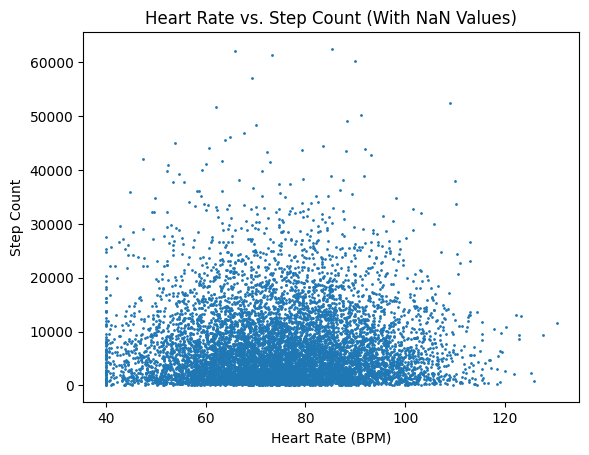

In [62]:
# Define x and y variables (replace 'Other Numeric Column' with your chosen column)
x = nanTable['Heart Rate (BPM)']
y = nanTable['Step Count']  # You can replace with another numeric column if needed

# Scatter plot with smaller points for better visibility
plt.scatter(x, y, s=1)

# Labels and title
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Step Count')  # Adjust based on your chosen variable
plt.title('Heart Rate vs. Step Count (With NaN Values)')

# Show the plot
plt.show()


Comparison of Scatter Plots: Cleaned vs. NaN Data
Cleaned Data (First Plot)

Step Count is capped around 21,000, reducing extreme outliers.
More structured distribution around ~75 BPM.
Horizontal clustering at the upper bound suggests controlled outliers.
NaN Data (Second Plot)

Step Count extends above 60,000, showing extreme outliers.
More dispersed and uneven distribution.
Higher variability and noise, making trends harder to interpret.

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

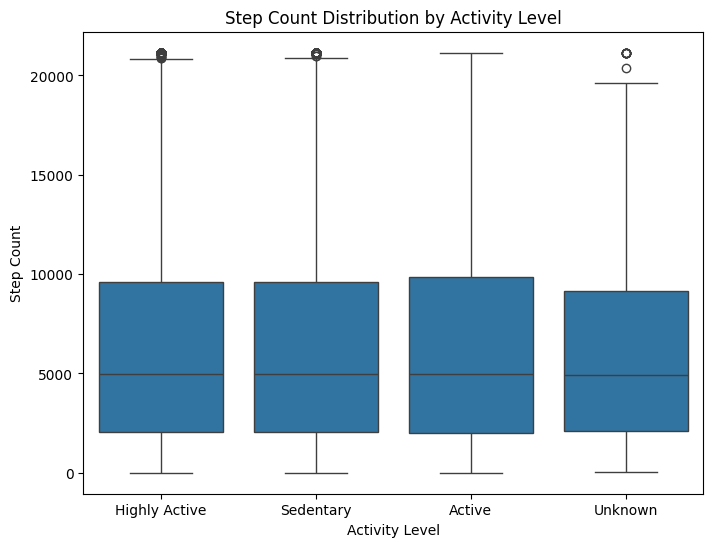

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare Step Count across Activity Levels
plt.figure(figsize=(8,6))
sns.boxplot(x=final_table['Activity Level'], y=final_table['Step Count'])
plt.title("Step Count Distribution by Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Step Count")
plt.show()


In [64]:
from scipy.stats import f_oneway

# Create separate tables for each activity level
sed = final_table[final_table['NumActivity'] == 3]  # Sedentary
act = final_table[final_table['NumActivity'] == 2]  # Active
hact = final_table[final_table['NumActivity'] == 1]  # Highly Active

# Perform ANOVA test
stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])

# Print results
print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.221, p-value: 0.801


Is there significant difference between the groups' step counts?  

ANSWER:

The ANOVA test statistic is 0.221, with a p-value of 0.801. Since the p-value is greater than 0.05, we fail to reject the null hypothesis.

This means that there is no statistically significant difference in step counts between the different activity level groups.

The boxplot also supports this conclusion, as the distributions of step counts appear quite similar across all activity levels, with overlapping interquartile ranges and whiskers.

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

1. Data Cleaning & Processing
Missing Values: Found in several columns, including Blood Oxygen Level (300), Step Count (100), Sleep Duration (~397), and Stress Level (249). Missing values were handled using median imputation where appropriate.
Outliers: Identified in Blood Oxygen Level (30 outliers) and Step Count (453 outliers). These were capped using statistical thresholds.
Inconsistent Labels: "Highly Active" and "Highly_Active," "Sedentary" and "Seddentary," "Active" and "Actve" were unified into consistent categories.
Mixed Data Types: The Stress Level column contained categorical values (e.g., "Very High"), which were converted to numerical values.
2. Statistical Analysis
Step Count Statistics:
Minimum: 0.91 steps
Maximum: 62,486.69 steps
Mean: ~6,985.69 steps
Heart Rate Statistics:
Minimum: 40 BPM
Maximum: 296.59 BPM
Mean: 75.13 BPM
Sleep Duration:
Minimum: -0.19 hours (indicating erroneous data)
Maximum: 12.14 hours
Mean: 6.51 hours
Blood Oxygen Level:
Range: 92.59% - 103.44%
Mean: 97.84%
3. Comparative Analysis
Activity Levels & Step Count:
ANOVA test showed no statistically significant difference in step counts between the three activity level groups (Sedentary, Active, Highly Active).
p-value 0.801, indicating no strong evidence that step count varies meaningfully across these groups.
4. Visualization Insights
Scatter Plots:
Relationship between Heart Rate & Step Count was weak or unclear.
Visualization helped in identifying outliers and missing values.
Box Plots for Step Count Across Activity Levels:
Confirmed that step count distributions were similar across activity levels, supporting the ANOVA test results.

To present findings ethically and avoid bias:

Acknowledge Data Limitations: State that missing values were imputed and outliers capped, which may impact accuracy.
Avoid Overgeneralization: The ANOVA test showed no significant step count differences by activity level, but other health factors may play a role.
Ensure Clarity: Use visuals and simple explanations to make findings accessible.
Address Biases: Avoid assumptions based on incomplete or unrepresentative data.
Offer Actionable Insights: Emphasize the need for better data collection and further research rather than making definitive claims.


Key Takeaways
Cleaning was crucial – the dataset contained errors, missing values, and inconsistencies that could have impacted analysis.
Activity levels may not strongly predict step count – counterintuitive given expected trends.
Some extreme outliers existed – e.g., negative sleep values, overly high step counts.
Statistical tests showed no significant group differences – suggesting that self-reported activity levels may not align well with recorded step data.
